## Dataset Details

Column Descriptions:
- **age:** Age of the patient in years
- **sex:** Male: 1; Female: 0
- **cp** (chest pain type):
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal
    - 3: asymptomatic
- **trestbps**: patient's level of blood pressure at resting mode in mm/HG
- **chol** (serum cholesterol in mg/dl)
- **fbs:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false 
- **restecg:** Result of electrocardiogram while at rest:
    - 0 : Normal 
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
        0.05 mV) 
    - 2: showing probable or definite left ventricular hypertrophyby Estes' criteria
- **thalach:** maximum heart rate achieved
- **exang:** exercise-induced angina (True/ False)
- **oldpeak:** ST depression induced by exercise relative to rest
- **slope:** ST segment measured in terms of slope during peak exercise
    - 0: up sloping
    - 1: flat 
    - 2: down sloping
- **ca:** number of major vessels (0-3) colored by fluoroscopy
- **thal** (blood disorder called thalassemia):  
    - 0: NULL 
    - 1: normal blood flow 
    - 2: fixed defect (no blood flow in some part of the heart) 
    - 3: reversible defect (a blood flow is observed but it is not normal)
- **target:**  
    - 1 means patient is suffering from heart disease
    - 0 means patient is normal

## Preparing the dataset

In [5]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
#observing the dataset
df_original = pd.read_csv('heart_disease_cleveland_patients.csv')
df_original.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0


In [7]:
#checking for missing values
df_original.isna().sum()

#no missing values observed in the dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

In [8]:
col_array = np.array(df_original.columns) #converting column list to an array to use in for loop
col_array = np.delete(col_array, [1,2,5,6,8,10,11,12,13]) #deleting categorical columns for descriptive statistic analysis

#calculating descriptive statistics for every column
for col in col_array:
    print(f'Descriptive statistics for "{col}": \n {df_original[col].describe()} \n')


Descriptive statistics for "age": 
 count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64 

Descriptive statistics for "trestbps": 
 count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64 

Descriptive statistics for "chol": 
 count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64 

Descriptive statistics for "thalach": 
 count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64 

Descriptive statistics for "oldpeak": 
 count    303.000000
mean       1.039604
std 

- age: It can be seen that the sample size range from adults in their early thirties to senior citizens. The mean is $\approx$ 54.439, which suggests that the data is skewed towards middle-aged citizens. This is further evidenced by the value of the first quartile: 48, which implies that only 25% of the sample size is below the age of 48. 
- trestbps: From the output it can be seen that mean is 131 and the median is 130. The only slightly alarming observation in the output is the max value of 200. As the mean is 131 and the third quartile is 140, there may be a possibility that a value of 200 is an outlier. This can be verified through a box plot. 
- chol:  For adults, cholestrol levels between 200-239 mg/dl are considered borderline high, and levels of 240 mg/dl or higher are considered high. The mean is 246, suggesting that most of the sample size has high cholestrol, which may lead to inaccurate conclusions. This is further evidenced by a Q1 value of 211, implying that 75% of the dataset has borderline high or high cholestrol. The max value is 564 mg/dl, which seems dangerously high and therefore it could be an outlier.

Box plot for age: 



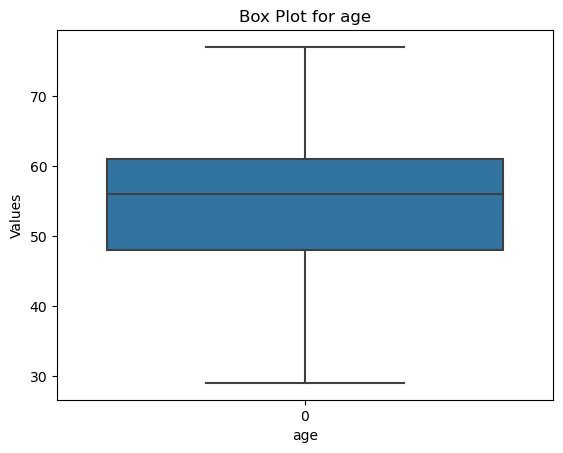

Box plot for trestbps: 



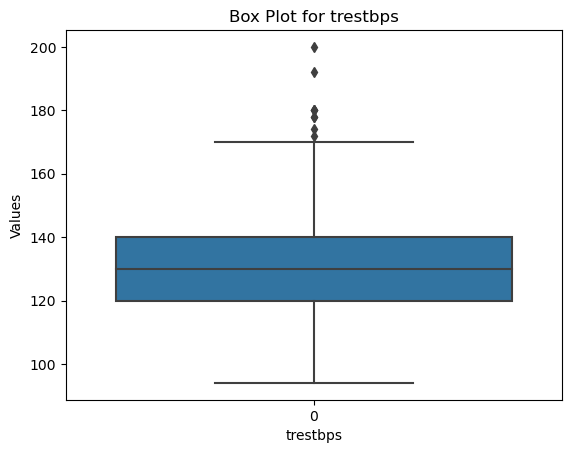

Box plot for chol: 



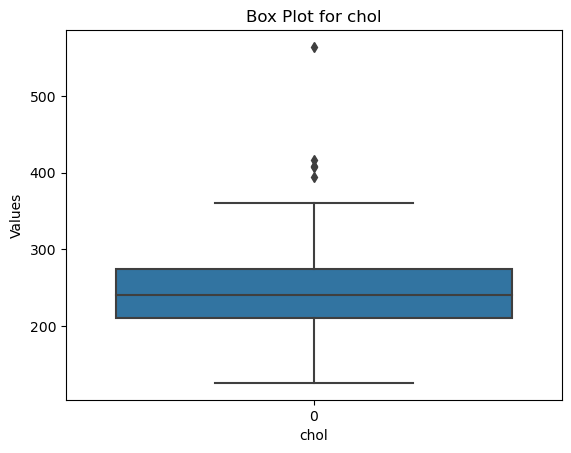

Box plot for thalach: 



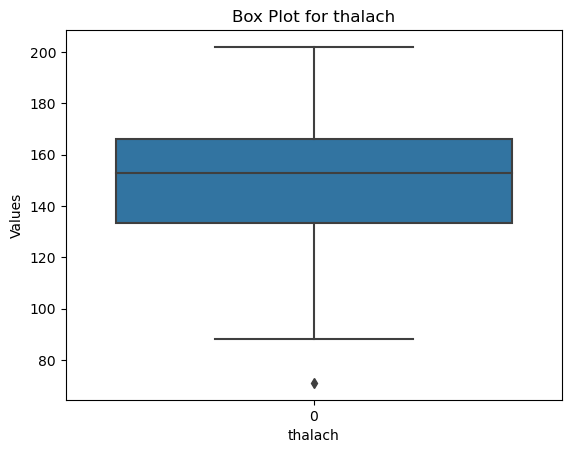

Box plot for oldpeak: 



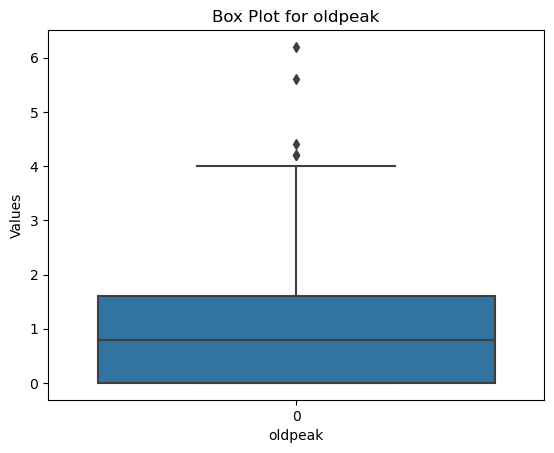

In [9]:
#plotting boxplots to observe outliers and distribution
for col in col_array: 
    print(f"Box plot for {col}: \n")
    sns.boxplot(data = np.array(df_original[col]))
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Values")
    plt.show()

age: plot shows no outliers for age

trestbps: plot suggests that every value above $\approx 170$ is an outlier - heart rate values above 170 at rest are considered extremely abnormal. Any indivdual with that rate would be unable to provide data as he/she would be in need of immediate medical help. Due to this reasoning, the values will be filterd.  

chol: plot suggests every value above $\approx 360$ is an outlier

thalach: plot shows one outlier below 80

oldpeak: plot suggests every value above $\approx 4$ is an outlier - while this conclusion makes sense theoretically, vaues for ST dperession between 4 and 5 have been observed. Hence, only values above 5 will be filtered. 

In [10]:
#dealing with outliers in trestbps
df_original = df_original[df_original.trestbps <= 170]

In [11]:
#dealing with outliers in chol
df_original = df_original[df_original.chol <= 360]

In [12]:
#dealing with outliers in thalach
df_original = df_original[df_original.thalach > 80]

In [13]:
#dealing with outliers in oldpeak:
df_original = df_original[df_original.oldpeak < 5]

Box plot for age: 



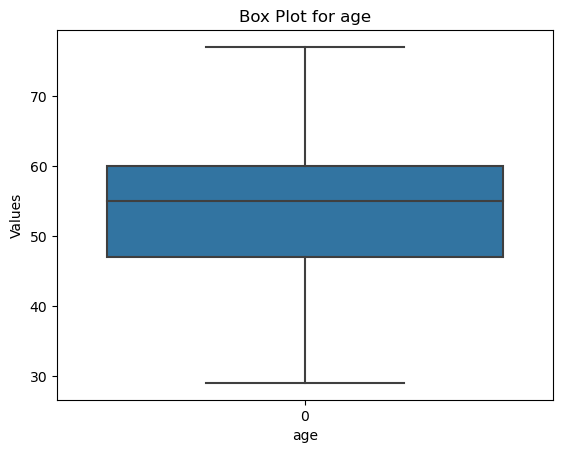

Box plot for trestbps: 



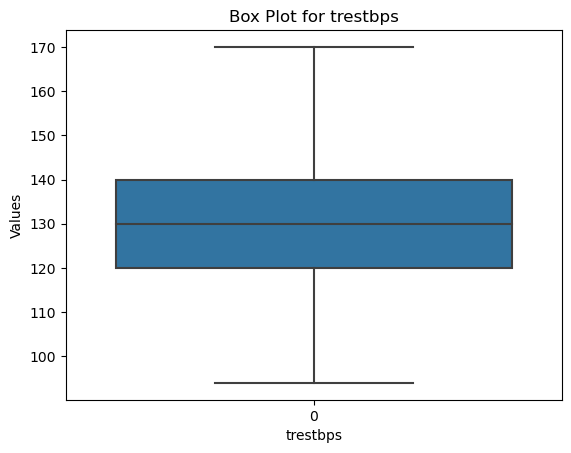

Box plot for chol: 



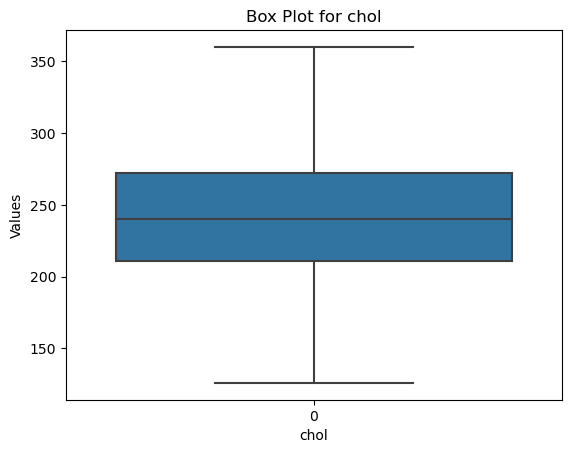

Box plot for thalach: 



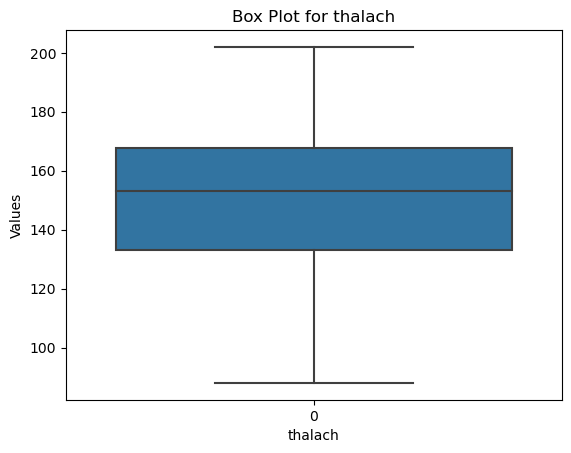

Box plot for oldpeak: 



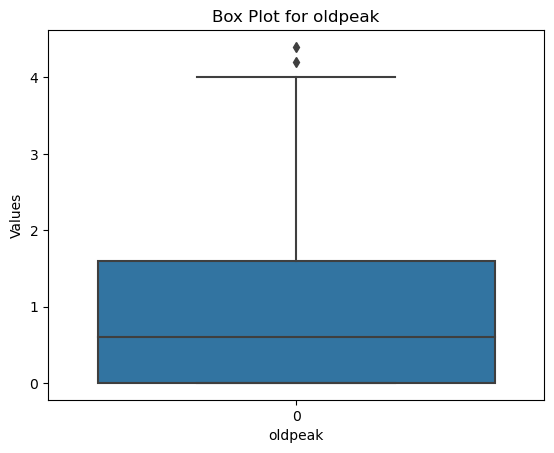

In [14]:
#plot boxplot to check if outliers have been removed
for col in col_array: 
    print(f"Box plot for {col}: \n")
    sns.boxplot(data = np.array(df_original[col]))
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Values")
    plt.show()

All outliers have been removed.

#### Exploring the categorical columns

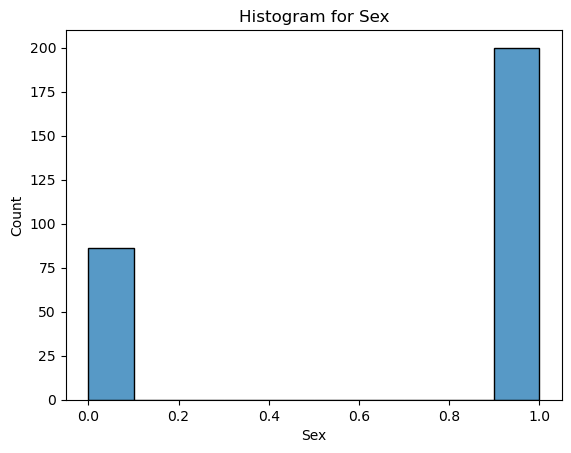

In [15]:
#observing distribution of sex
sns.histplot(df_original['sex'])
plt.title(f"Histogram for Sex")
plt.xlabel('Sex')
plt.ylabel("Count")
plt.show()

In [16]:
df_original.groupby('sex')['sex'].count()

sex
0     86
1    200
Name: sex, dtype: int64

There are 114 more men in the sample size, suggesting that results may be inaccurate for the population.

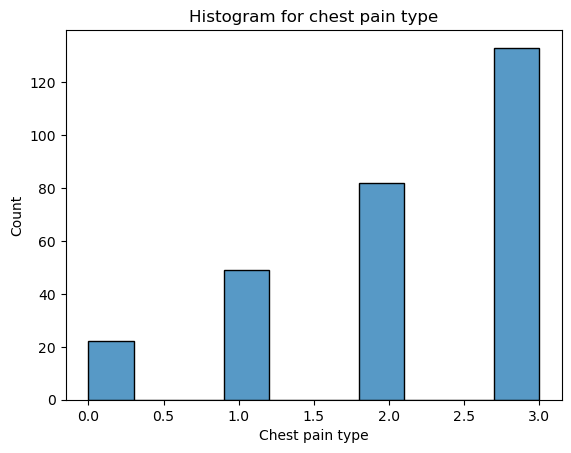

In [17]:
#observing cp column
sns.histplot(df_original['cp'])
plt.title(f"Histogram for chest pain type")
plt.xlabel('Chest pain type')
plt.ylabel("Count")
plt.show()

Asymptomatic pain is most commonly observed in the sample size. Taking a step further, we can observe if this differs by age: 

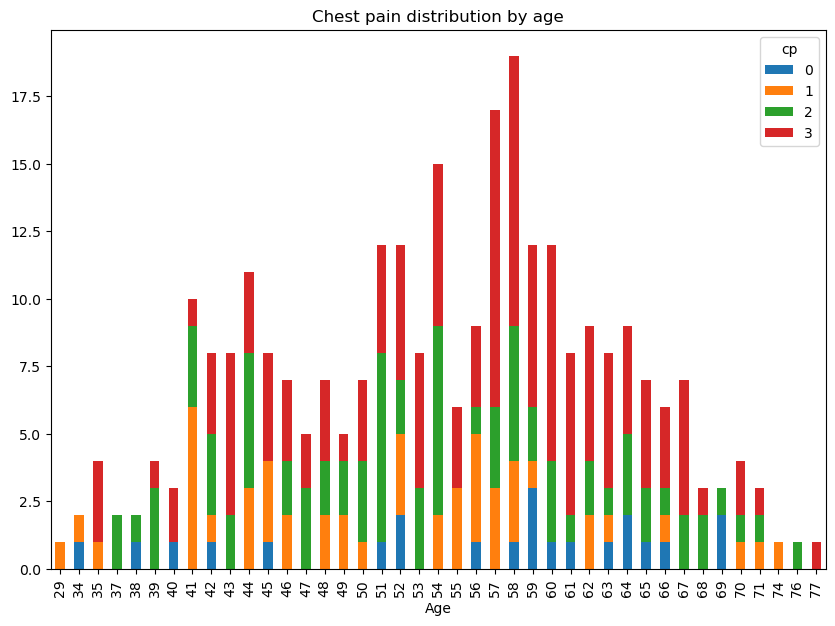

In [18]:
df_age_cp = df_original.groupby(['age', 'cp']).size().unstack(fill_value=0)
df_age_cp.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Chest pain distribution by age')
plt.xlabel('Age')
plt.legend(title='cp')
plt.show()

Asymptomatic (Red): This is the most common chest pain type across almost all age groups. It shows a significant presence especially in the age ranges 50-60.

Non-anginal (Green): This type is also relatively common and is seen across various age groups but with less frequency compared to type 3.

Atypical angina (Orange): Less common than types 2 and 3 but still present across many age groups.

Typical angina (Blue): The least common type, with sporadic occurrences in the dataset.

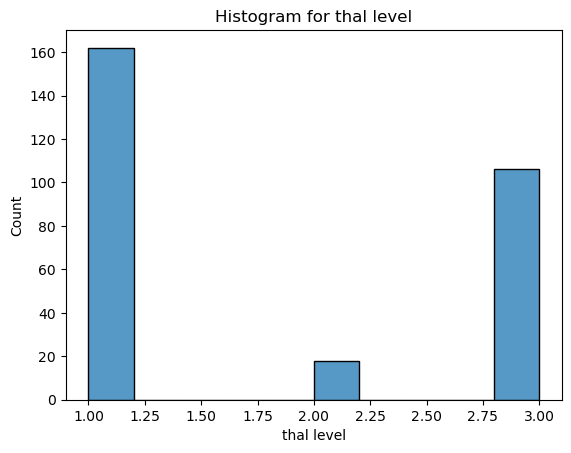

In [19]:
#observing thal column
sns.histplot(df_original['thal'])
plt.title(f"Histogram for thal level")
plt.xlabel('thal level')
plt.show()

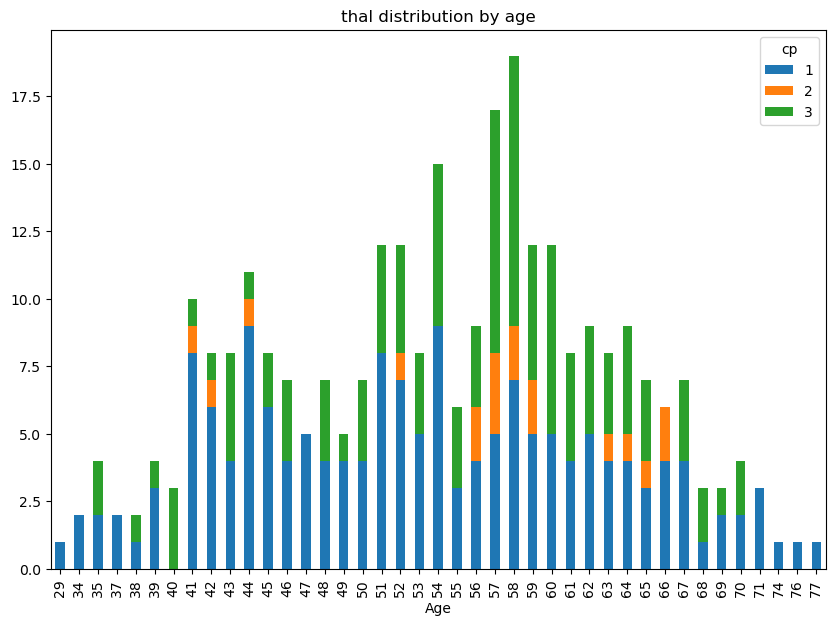

In [20]:
#observing thal conditions based on age
df_age_cp = df_original.groupby(['age', 'thal']).size().unstack(fill_value=0)
df_age_cp.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('thal distribution by age')
plt.xlabel('Age')
plt.legend(title='cp')
plt.show()

Normal Blood Flow (Blue): This type is quite frequent across various age groups, particularly in the age range of 40-50.

Fixed Defect (Orange): This type is less common but still present across multiple age groups. It is sporadically distributed.

Reversible Defect (Green): This is the most frequent type, particularly prominent in the age range of 50-60.

### Bivariate Analysis

In [21]:
df_corr = df_original.drop(df_original.columns[[1,2,5,6,8,10,11,12,13]], axis=1)
corr_mat = df_corr.corr()
corr_mat

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.281750,0.173186,-0.407263,0.200507
trestbps,0.281750,1.000000,0.118514,-0.068867,0.127394
chol,0.173186,0.118514,1.000000,-0.025359,0.018794
thalach,-0.407263,-0.068867,-0.025359,1.000000,-0.347206
oldpeak,0.200507,0.127394,0.018794,-0.347206,1.000000


The above can be represented by a heatmap as well:

<AxesSubplot: >

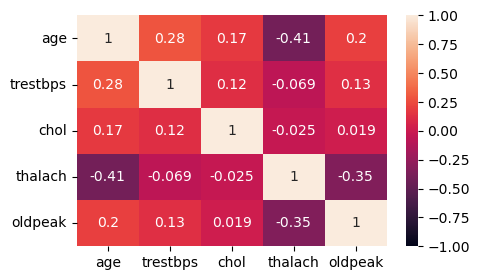

In [22]:
plt.figure(figsize=(5,3))
sns.heatmap(corr_mat, annot=True, vmin=-1, vmax=1)

**The above can also be viewed through a pairplot**

**A connection that would be interesting to observe is the difference in cholestrol levels between healthy people and people without a heart disease.** This would be interesting to test due to the common claim that "high cholestrol results in poor cardiac health" hold true for this sample. 

This will be done in two steps:
1. Segregate df_original into patients with and without heart disease and observe the difference in mean cholestrol level 
2. Conduct a difference in means hypothesis test to establish siginificance of conclusion on the population


In [23]:
#segregating dataframes
df_poor_health = df_original[df_original.target == 1]
df_good_health = df_original[df_original.target == 0]
poor_health_mean = df_poor_health['chol'].mean()
good_health_mean = df_good_health['chol'].mean()
print(f"The difference between average cholestrol levels for those with poor and good heart health is: {poor_health_mean-good_health_mean}")

The difference between average cholestrol levels for those with poor and good heart health is: 10.87341772151899


In [24]:
#conducting the difference in means test 

Hypotheses for the test:
- µ<sub>h</sub> represents the mean cholestrol levels for patients that have a heart disease
- µ<sub>n</sub> represent the mean cholestrol levels for patients that have normal health

$H_0: \mu_h - \mu_n = 0$

$H_{\alpha}: \mu_h \neq \mu_n$

**Conditions:**
1. Sample of patients with normal health levels is randomly sampled: this condition is satisfied. 
2. $n_{h}=164<10$% of all patients in Cleveland who have normal levels of health: this condition is satisfied because it can be assumed that the total number of people in Cleveland with normal health is definitely greater 1640.
3. Sample with patients with heart disease is randomly sampled: this condition is satisfied. 
4. $n_{n}=139<10$% of all patients in Cleveland who have a heart disease: this condition is satisfied because it can be assumed that the number of people in Cleveland who have a heart disease is greater than 1390.   
5. $n_{h}=164>30$ OR <s>the population (or sample) distribution of patients with normal health cholestrol levels is normal.</s>
5. $n_{n}=139>30$ OR <s>the population (or sample) distribution of patients with heart disease cholestrol levels is normal.</s> 
6. We can assume that there is no pairwise relationship between the cholestrol levels of both groups in this sample.

**Calculating t-stat by hand**

test statistic = 
$\frac{(\bar{x}_{h}-\bar{x}_{n}) - (\mu_{h} - \mu_{n})}{\sqrt{\frac{s^2_{h}}{n_{h}}  +\frac{s^2_{n}}{n_{n}} }}$

In [25]:
print(f"mean_h = {poor_health_mean}, mean_n = {good_health_mean}")

mean_h = 249.0, mean_n = 238.126582278481


In [26]:
print(f"sd_h = {df_poor_health['chol'].std()}, sd_n = {df_good_health['chol'].std()}")

sd_h = 46.11027521404487, sd_n = 43.461049869517694


In [27]:
print(f"n_h = {df_poor_health.shape[0]}, n_n = {df_good_health.shape[0]}")

n_h = 128, n_n = 158


In [28]:
xh = 249.0
xn = 238.1265
nh = 128
nn = 158
sd_h_sqr = (46.1103)**2
sd_n_sqr = (43.461)**2
t_stat_num = (xh-xn)-0
t_stat_den = ((sd_h_sqr/nh) + (sd_n_sqr/nn))**.5
t_stat = t_stat_num/t_stat_den
t_stat

2.034459374171941

In [29]:
#don't know population standard deviation so we're using the t distribution
from scipy.stats import t
pval = 1 - t.cdf(2.0344593,df=138)
pval

0.021910376740895465

The assumed confidence level at which this hypothesis conducted is 95% i.e. $\alpha$ = 0.05. The calculated p-value was 0.0219. Since 0.0219 < 0.05 (i.e. p-value > $\alpha$), there is enough evidence to reject the null. Hence, I can conclude that patients with heart disease do seem to have higher cholestrol levels than patients with normal health. 

**Another interesting claim that could be tested is that blood pressure increases with age i.e. what is the relationship between age and the patient's blood pressure at rest?** 

The basic overview of this relationship can be seen through the heatmap above, but it can be further observed through a scatterplot and line of best fit. 

This relationship will only be observed for healthy people as heart health can also have an impact blood pressure. 

In [30]:
df_good_health.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0
7,57,0,3,120,354,0,0,163,1,0.6,0,0,1,0


Text(0.5, 1.0, 'Relationship between age and blood pressure levels')

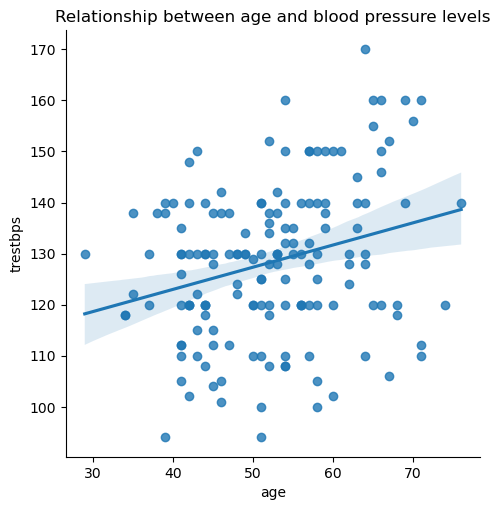

In [31]:
sns.lmplot(x='age', y='trestbps', data=df_good_health)
plt.title('Relationship between age and blood pressure levels')

As we can see above, there is a very slight positive correlation between the two. We can quanitfy this relationship using the R-squared value shown below: 

In [32]:
descriptivemod = smf.ols('trestbps~age', data=df_good_health).fit()
descriptivemod.rsquared

0.0753187284870308

As shown above, the $R^2$ value is only 0.07532. This shows an extremely small positive correlation between the two variables.

Observing if the claim of "blood pressure inceasing with age" holds true for a specific gender:

In [33]:
#mapping numerical sex values of 0 and 1 to Male and Female
df_dup = df_original
df_dup['sex_cat'] = df_dup['sex'].map({0:'Female', 1:'Male'})
df_dup.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_cat
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,Male
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,Male
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,Male
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,Male
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,Female


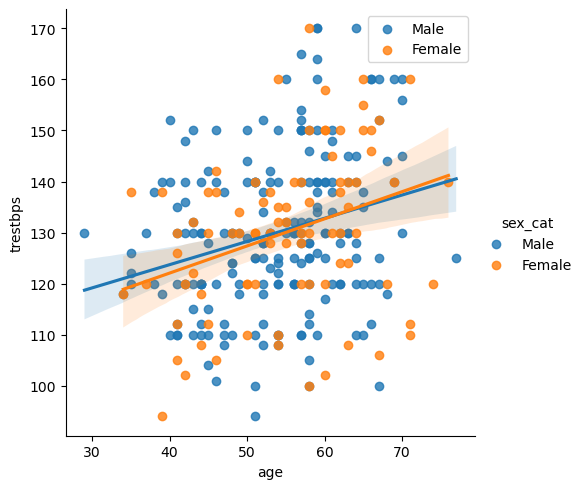

In [34]:
sns.lmplot(x='age', y='trestbps', hue='sex_cat', data=df_dup)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

- Correlation between age and blood pressure levels is stronger for women compared to men (by an extremely miniscule amount)
- At a younger age (<50), women have a lower blood pressure level. But, as they get older (>50), women seem to be at a higher risk for increased blood pressure levels

To obtain an alternate view of the relationship **just between sex and blood pressure levels**, the variables can be plotted using a violinplot. This is shown below:

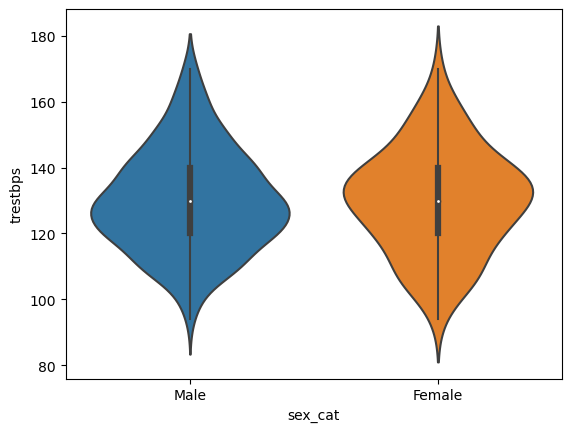

In [35]:
sns.violinplot(x='sex_cat',y='trestbps',data=df_dup)
plt.show()

## Logistic Regression Model

<u>Is there a relationship between cholestrol levels, blood pressure levels, maximum heart rate, exercise induced st depression and the log odds of the heart health of the patient?</u>

**Splitting the dataset into a training and testing**

The training data set will be a random selection of 80% of the observation from df, and the test will be 20%.

In [38]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_original,
                                     test_size=0.20,
                                     random_state=123)
#Double checking the percentage of values in df_train:
df_train.shape[0]/df_original.shape[0]

0.7972027972027972

**Performing a backwards elimination algorithm to find a parsimonious model:** Starting with four (or more) explanatory variables and using training
dataset to perform a backwards elimination algorithm (using AIC or BIC) to
help find a parsimonious logistic regression model

<u>Iteration 1 of backwards elimination - fitting the model with all 4 explanatory variables:</u>

In [39]:
mod1 = smf.logit('target~chol+trestbps+thalach+oldpeak',data=df_train).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.520170
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  228
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                            4
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                  0.2435
Time:                        12:29:10   Log-Likelihood:                -118.60
converged:                       True   LL-Null:                       -156.77
Covariance Type:            nonrobust   LLR p-value:                 1.034e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3518      1.835     -0.192      0.848      -3.949       3.246
chol           0.0067      0.004      1.756      0.079      -0.001       0.014
trestbps       0.0189      0.011      1.770      0.077      -0.002       0.040
thalach       -0.0318      0.008     -4.135      0.000      -0.047      -0.017
oldpeak        0.8382      0.170      4.922      0.000       0.504       1.172
==============================================================================
"""

In [40]:
print('Iteration 1 BIC with all 4 variables:',mod1.bic)

Iteration 1 BIC with all 4 variables: 264.3441628809441


Deleting the explanatory variable 'thalach' from the regression:

In [41]:
mod2 = smf.logit('target~chol+trestbps+oldpeak',data=df_train).fit()
mod2.summary()
print('Iteration 1 BIC with thalach deleted:', mod2.bic)

Optimization terminated successfully.
         Current function value: 0.561878
         Iterations 6
Iteration 1 BIC with thalach deleted: 277.93371994973586


Deleting thalach resulted in a higher BIC, so I'm going to try another variable.

Deleting the explanatory variable 'oldpeak' from the regression:

In [42]:
mod3 = smf.logit('target~chol+trestbps+thalach',data=df_train).fit()
mod3.summary()
print('Iteration 1 BIC with oldpeak deleted:', mod3.bic)

Optimization terminated successfully.
         Current function value: 0.583679
         Iterations 5
Iteration 1 BIC with oldpeak deleted: 287.874841504596


Deleting the explanatory variable 'trestbps' from the regression:

In [43]:
mod4 = smf.logit('target~chol+thalach+oldpeak',data=df_train).fit()
print('Iteration 1 BIC with trestbps deleted:', mod4.bic)

Optimization terminated successfully.
         Current function value: 0.527181
         Iterations 6
Iteration 1 BIC with trestbps deleted: 262.1120293155133


The value of BIC fell, however, given the chance that deleting 'chol' may yield a smaller BIC value:

Deleting the explanatory variable 'chol' from the regression: 

In [44]:
mod5 = smf.logit('target~trestbps+thalach+oldpeak',data=df_train).fit()
print('Iteration 1 BIC with chol deleted:', mod5.bic)

Optimization terminated successfully.
         Current function value: 0.527067
         Iterations 6
Iteration 1 BIC with chol deleted: 262.059714531115


As seen above, the model that observed the lowest value of BIC was mod5. Hence, this becomes the new model and the following iteration tests out BIC with the remaining variables of 'thalach', 'trestbps', and 'oldpeak'.

<u> Iteration 2 of backwards elimination: </u>

In [45]:
print('Current BIC:', mod5.bic)

Current BIC: 262.059714531115


Deleting the variable 'thalach' from mod5 regression: 

In [46]:
mod6 = smf.logit('target~trestbps+oldpeak',data=df_train).fit()
print('Iteration 2 BIC with thalach deleted:', mod6.bic)

Optimization terminated successfully.
         Current function value: 0.567477
         Iterations 6
Iteration 2 BIC with thalach deleted: 275.05772958613727


Deleting the variable 'oldpeak' from mod5 regression:

In [47]:
mod7 = smf.logit('target~trestbps+thalach',data=df_train).fit()
print('Iteration 2 BIC with oldpeak deleted:', mod7.bic)

Optimization terminated successfully.
         Current function value: 0.588125
         Iterations 5
Iteration 2 BIC with oldpeak deleted: 284.4731104930668


Deleting the variable 'trestbps' from mod5 regression:

In [48]:
mod8 = smf.logit('target~thalach+oldpeak',data=df_train).fit()
print('Iteration 2 BIC with trestbps deleted:', mod8.bic)

Optimization terminated successfully.
         Current function value: 0.536754
         Iterations 6
Iteration 2 BIC with trestbps deleted: 261.0477895873041


As seen above, the model that observed the lowest value of BIC was mod8. Hence, this becomes the new current model and the following iteration tests out BIC with the remaining variables of 'thalach', and 'oldpeak'.

<u> Iteration 3 of backwards elimination: </u>

In [49]:
print('Current BIC:',mod8.bic)

Current BIC: 261.0477895873041


Deleting the variable 'thalach' from mod8 regression:

In [50]:
mod9 = smf.logit('target~oldpeak',data=df_train).fit()
print('Iteration 3 BIC with thalach deleted:',mod9.bic)

Optimization terminated successfully.
         Current function value: 0.576489
         Iterations 5
Iteration 3 BIC with thalach deleted: 273.7377618842483


Deleting the variable 'oldpeak' from mod8 regression:

In [53]:
mod10 = smf.logit('target~thalach',data=df_train).fit()
print('Iteration 3 BIC with oldpeak deleted:',mod10.bic)

Optimization terminated successfully.
         Current function value: 0.604670
         Iterations 5
Iteration 3 BIC with oldpeak deleted: 286.58838587088445


As seen above, there were no models that had a lower BIC score than mod8. Hence, the parsimonious logistic regression mode is mod8. The summary is shown below:

In [54]:
final_model = mod8
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  228
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                  0.2194
Time:                        12:30:56   Log-Likelihood:                -122.38
converged:                       True   LL-Null:                       -156.77
Covariance Type:            nonrobust   LLR p-value:                 1.158e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4502      1.141      3.025      0.002       1.215       5.686
thalach       -0.0300      0.007     -4.061      0.000      -0.044      -0.016
oldpeak        0.8397      0.166      5.053      0.000       0.514       1.165
==============================================================================
"""

Plotting model using test dataset:

In [56]:
final_model = smf.logit('target~thalach+oldpeak',data=df_test).fit()
final_model_train.summary()

Optimization terminated successfully.
         Current function value: 0.504411
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  228
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                  0.2194
Time:                        12:36:02   Log-Likelihood:                -122.38
converged:                       True   LL-Null:                       -156.77
Covariance Type:            nonrobust   LLR p-value:                 1.158e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4502      1.141      3.025      0.002       1.215       5.686
thalach       -0.0300      0.007     -4.061      0.000      -0.044      -0.016
oldpeak        0.8397      0.166      5.053      0.000       0.514       1.165
==============================================================================
"""

**v)** Write out the logistic regression equation for your final model 

$log(\frac{\hat{p}}{1-\hat{p}}) = 3.4502 - 0.0300\;*\;$**thalach** $\;+\;0.8397\;*\;$**oldpeak**

In order to check if there is sufficient evidence to suggest that the slopes of 'thalach' and 'oldpeak' are non-zero, the p-values need to bechecked and compared to $\alpha = 0.05$. 
- Slope for 'thalach': As seen in the table, the p value for this explanatory variable is 0. This is less than the $\alpha$ value of 0.05. Hence, there is enough evidence to conclude that the slope is non-zero. 
- Slope for 'oldpeak': As seen in the table, the p value for this explanatory variable is 0. This is less than the $\alpha$ value of 0.05. Hence, there is enough evidence to conclude that the slope is non-zero.  

So there is enough evidence to suggest all slopes in the final model are non-zero.

**Evaluating the testing model using ROC AUC Curve:**

In [66]:
#Calculating predictive probabilites: should I do this using the train datatset?
phat_test = final_model_train.predict(exog=df_test
                                [['thalach', 'oldpeak']])
phat_test.head(10)

257    0.709823
30     0.606473
286    0.805679
81     0.376811
225    0.151753
299    0.888545
248    0.321008
235    0.934495
139    0.619261
277    0.248070
dtype: float64

In [67]:
df_test['phat_test']=phat_test
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_cat,phat_test
257,76,0,2,140,197,0,1,116,0,1.1,1,0,1,0,Female,0.709823
30,69,0,0,140,239,0,0,151,0,1.8,0,2,1,0,Female,0.606473
286,58,0,3,170,225,1,2,146,1,2.8,1,2,2,1,Female,0.805679
81,53,0,3,130,264,0,2,143,0,0.4,1,0,1,0,Female,0.376811
225,34,0,1,118,210,0,0,192,0,0.7,0,0,1,0,Female,0.151753
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1,Male,0.888545
248,52,1,3,125,212,0,0,168,0,1.0,0,2,3,1,Male,0.321008
235,54,1,3,122,286,0,2,116,1,3.2,1,2,1,1,Male,0.934495
139,51,1,2,125,245,1,2,166,0,2.4,1,0,1,0,Male,0.619261
277,39,0,2,138,220,0,0,152,0,0.0,1,0,1,0,Female,0.248070


In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_pew, tpr_pew, thresholds = roc_curve(y_true=df_test['target'], y_score=df_test['phat_test'])
auc_pew = roc_auc_score(y_true=df_test['target'], y_score=df_test['phat_test'])

In [80]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

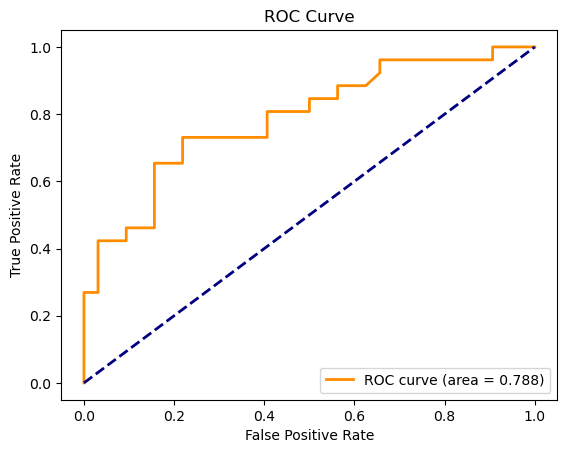

In [81]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

The AUC for test dataset is 0.788. The AUC is closer to the value of 1 than it is to 0.5, which suggests that predictive probability threshold of 0.5 does an okay job of getting close to the ideal scenario of a false positive rate of 0 and true positive rate of 1. 

**Using ROC to pick a good predictive probability threshold:**

To pick a good probability threshold, points of fpr and tpr that are closest to the ideal situation of fpr = 0 and tpr = 1 need to be identified. There are 2 options from the above ROC curve that stand out for this point:
- Option 1: Approximately (FPR = 0.175, TPR = 0.65)
    - Past the 0.175 mark of FPR, the rate of increase of FPR starts to level. Decreasing the TPR further does not provide a substantial decrease in the FPR level. Hence, this is one option that could give result a probable predictive threshold
- Option 2: Approximately (FPR = 0.4, TPR = 0.8)
    - At the 0.4 mark, the TPR starts to level. Since the TPR level is already 0.8 at this stage, increasing the FPR for a slight increase of 0.2 does not make much sense. Hence, this option could also result in an ideal predictive threshold
    
For this scenario, the true positive rate is much more important than the false positive rate. The model predicts the patient's heart health i.e. if the patient has a heart disease or is normal. Getting a positive result that eventually turns out to be false is not that consequential. It is more important to ensure that the patient's who have a heart disease definitely receive a positive result. Getting a negative result could be life threatening. Hence, the predictive proability threshold that maximizes the TPR would be the right choice. Therefore, option 2 (FPR=0.4, TPR=0.8) is the ideal probability threshold for this model. 

In [82]:
# Printing TPR, FPR, and thresholds combinations

for i in range(len(thresholds)):
    print(f"Threshold: {thresholds[i]:.2f}, TPR: {tpr_pew[i]:.2f}, FPR: {fpr_pew[i]:.2f}")

Threshold: 1.94, TPR: 0.00, FPR: 0.00
Threshold: 0.94, TPR: 0.04, FPR: 0.00
Threshold: 0.81, TPR: 0.27, FPR: 0.00
Threshold: 0.78, TPR: 0.27, FPR: 0.03
Threshold: 0.73, TPR: 0.42, FPR: 0.03
Threshold: 0.66, TPR: 0.42, FPR: 0.09
Threshold: 0.64, TPR: 0.46, FPR: 0.09
Threshold: 0.61, TPR: 0.46, FPR: 0.16
Threshold: 0.53, TPR: 0.65, FPR: 0.16
Threshold: 0.51, TPR: 0.65, FPR: 0.22
Threshold: 0.46, TPR: 0.73, FPR: 0.22
Threshold: 0.34, TPR: 0.73, FPR: 0.41
Threshold: 0.31, TPR: 0.81, FPR: 0.41
Threshold: 0.28, TPR: 0.81, FPR: 0.50
Threshold: 0.28, TPR: 0.85, FPR: 0.50
Threshold: 0.25, TPR: 0.85, FPR: 0.56
Threshold: 0.24, TPR: 0.88, FPR: 0.56
Threshold: 0.23, TPR: 0.88, FPR: 0.62
Threshold: 0.23, TPR: 0.92, FPR: 0.66
Threshold: 0.22, TPR: 0.96, FPR: 0.66
Threshold: 0.19, TPR: 0.96, FPR: 0.72
Threshold: 0.15, TPR: 0.96, FPR: 0.91
Threshold: 0.13, TPR: 1.00, FPR: 0.91
Threshold: 0.11, TPR: 1.00, FPR: 1.00


The option that most closely matches the predicted best probability threshold is **threshold = 0.31**

In [79]:
# Determining the optimal threshold using Youden's J statistic

J_scores = tpr_pew - fpr_pew
optimal_idx = np.argmax(J_scores)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold (Youden's J):", optimal_threshold)

Optimal Threshold (Youden's J): 0.4567796270257789


As seen from the above result, the actiual best probability threshold is option 2 i.e. **threshold = 0.45**

In [83]:
df_test['target_hat'] = df_test['phat_test'] > 0.45
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_cat,phat_test,target_hat
257,76,0,2,140,197,0,1,116,0,1.1,1,0,1,0,Female,0.709823,True
30,69,0,0,140,239,0,0,151,0,1.8,0,2,1,0,Female,0.606473,True
286,58,0,3,170,225,1,2,146,1,2.8,1,2,2,1,Female,0.805679,True
81,53,0,3,130,264,0,2,143,0,0.4,1,0,1,0,Female,0.376811,False
225,34,0,1,118,210,0,0,192,0,0.7,0,0,1,0,Female,0.151753,False
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1,Male,0.888545,True
248,52,1,3,125,212,0,0,168,0,1.0,0,2,3,1,Male,0.321008,False
235,54,1,3,122,286,0,2,116,1,3.2,1,2,1,1,Male,0.934495,True
139,51,1,2,125,245,1,2,166,0,2.4,1,0,1,0,Male,0.619261,True
277,39,0,2,138,220,0,0,152,0,0.0,1,0,1,0,Female,0.248070,False


**Using the best classification theeshold to calculate TPR and FPR:**

In [84]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [85]:
confusion_matrix(y_true=df_test['target'], y_pred=df_test['target_hat'])
tn, fp, fn, tp = confusion_matrix(y_true=df_test['target'],
                                 y_pred=df_test['target_hat']).ravel()
(tn, fp, fn, tp)

(25, 7, 7, 19)

In [86]:
tpr = 24/(24+4)
fpr = 21/(21+12)
print(tpr, fpr)

0.8571428571428571 0.6363636363636364


The total positive rate is 0.8571 and the false positive rate 0.6364. Evaluating this value, it is reasonable to take a higher threshold to ensure that the true postive rate is higher. This is because (as mentioned previously), having a high false positive rate is not harmful, however having a low true positive rate is extremely detrimental.

## Future Steps

- Performing a difference in means hypothesis test for other explanatory variables for detailed and guided feature selection
- One-hot encoding the categorical variables in the dataset to use as predictors in the Logistic Regression model
- Constructing an ROC AUC Curve on the training dataset and comparing it to the test dataset ROC AUC to test for overfitting
- Using cross-validation and metrics such as precision, F1 Score, and ROC AUC to choose between Logistic Regression and other classification models such as SVM, Decision Tree and Random Forest. Subsequently, selecting the best model for heart health prediction